In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from windrose import WindroseAxes
import matplotlib.dates as mdates
sns.set(style="whitegrid")
df = pd.read_csv("../data/raw/benin-malanville.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [11]:
print("Summary Statistics:")
print(df.describe())
print("\nMissing Values:")
missing = df.isna().sum()
print(missing)
total_rows = len(df)
print("\nColumns with >5% Missing Values:")
print(missing[missing > 0.05 * total_rows])

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [12]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of rows with outliers (|Z|>3): {outliers.sum()}")
for col in key_cols:
    df[col] = df[col].fillna(df[col].median())
print("\nMissing Values After Imputation:")
print(df[key_cols].isna().sum())
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/benin-malanville_clean.csv', index=True)
print("Cleaned DataFrame exported to ../data/processed/benin-malanville_clean.csv")

Number of rows with outliers (|Z|>3): 7740

Missing Values After Imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Cleaned DataFrame exported to ../data/processed/benin-malanville_clean.csv


d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


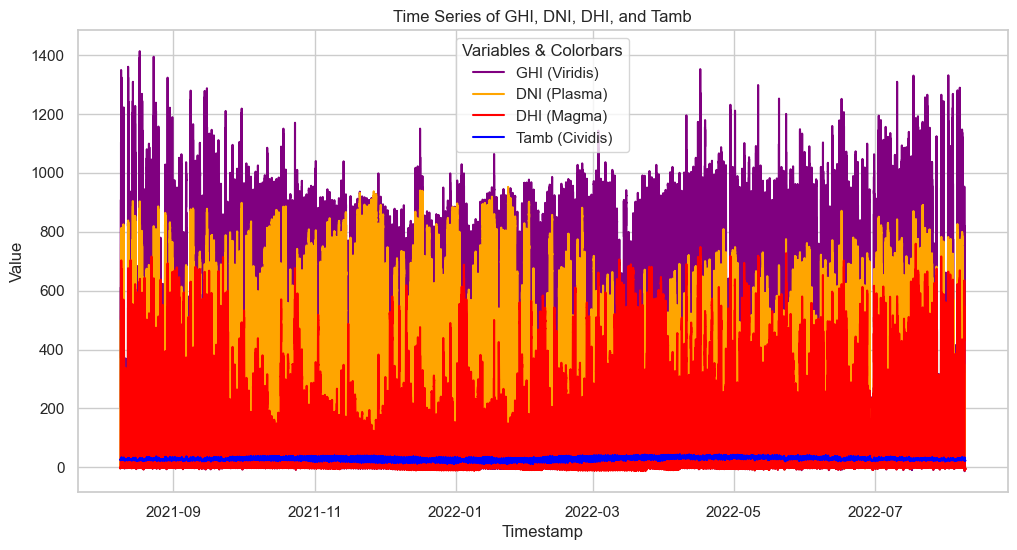

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_3224\644788533.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


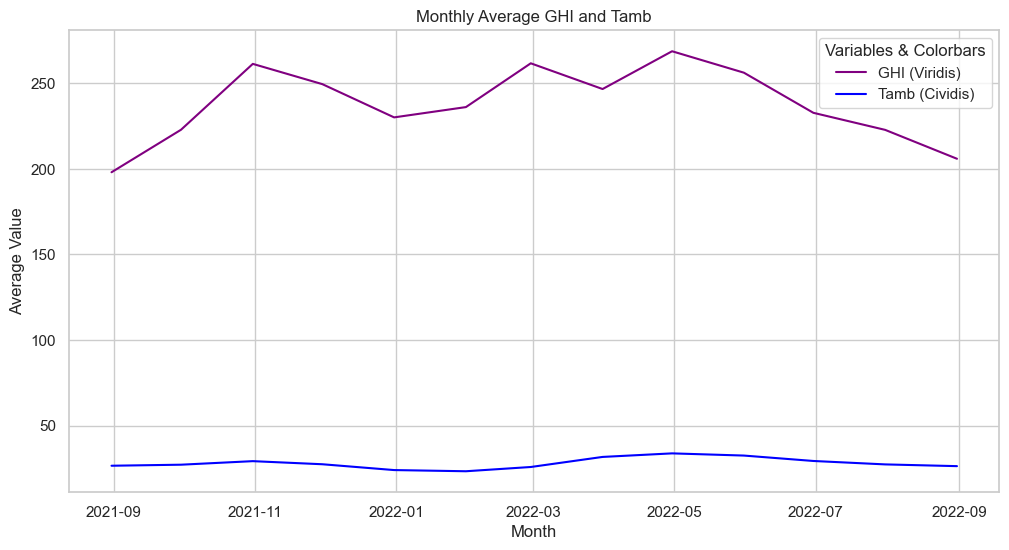

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GHI'], label='GHI (Viridis)', color='purple') 
plt.plot(df.index, df['DNI'], label='DNI (Plasma)', color='orange')  
plt.plot(df.index, df['DHI'], label='DHI (Magma)', color='red')      
plt.plot(df.index, df['Tamb'], label='Tamb (Cividis)', color='blue') 
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.legend(title="Variables & Colorbars")
plt.show()
df_monthly = df.resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['GHI'], label='GHI (Viridis)', color='purple')
plt.plot(df_monthly.index, df_monthly['Tamb'], label='Tamb (Cividis)', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average GHI and Tamb')
plt.legend(title="Variables & Colorbars")
plt.show()

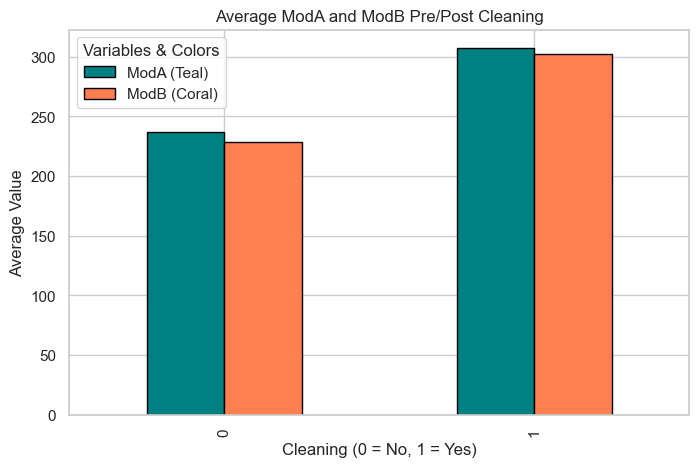

In [14]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
ax = cleaning_impact.plot(kind='bar', figsize=(8, 5), color=['teal', 'coral'], edgecolor='black')
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.legend(labels=['ModA (Teal)', 'ModB (Coral)'], title="Variables & Colors")
plt.show()

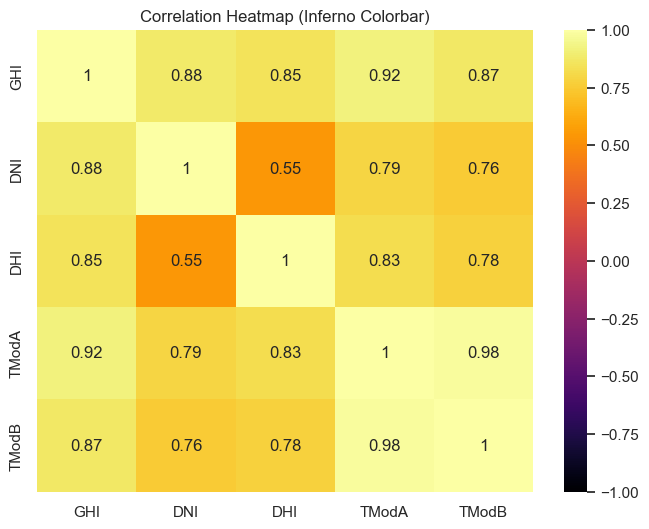

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_3224\3826751099.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


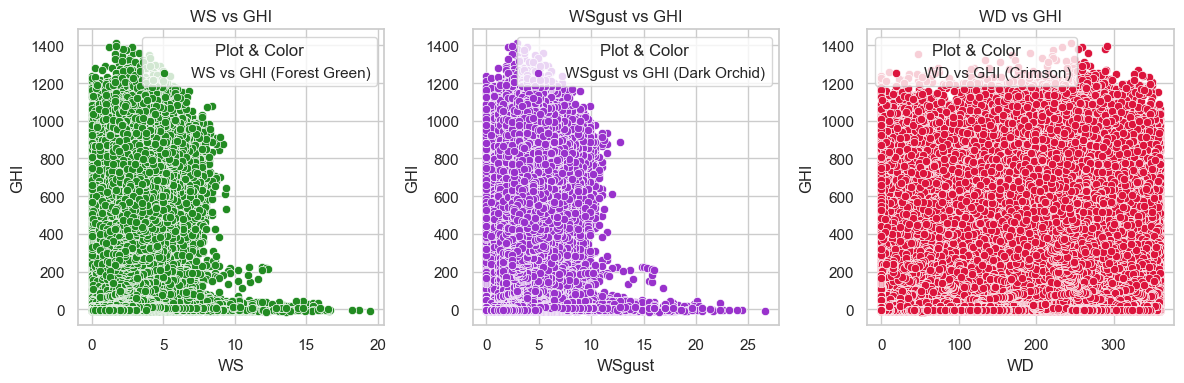

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_3224\3826751099.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


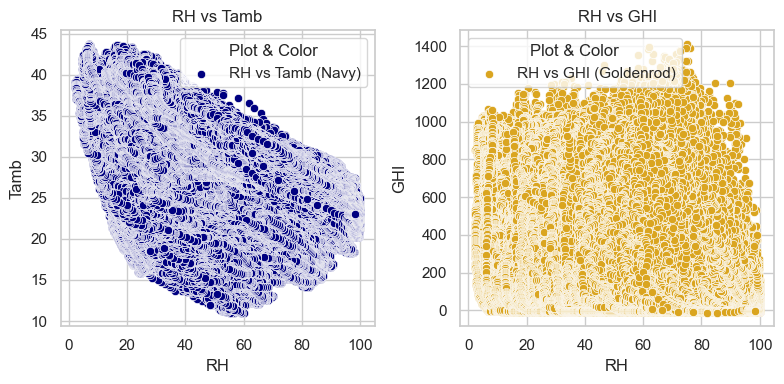

In [15]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Inferno Colorbar)')
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df, color='forestgreen', label='WS vs GHI (Forest Green)')
plt.legend(title="Plot & Color")
plt.title('WS vs GHI')
plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df, color='darkorchid', label='WSgust vs GHI (Dark Orchid)')
plt.legend(title="Plot & Color")
plt.title('WSgust vs GHI')
plt.subplot(1, 3, 3)
sns.scatterplot(x='WD', y='GHI', data=df, color='crimson', label='WD vs GHI (Crimson)')
plt.legend(title="Plot & Color")
plt.title('WD vs GHI')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='navy', label='RH vs Tamb (Navy)')
plt.legend(title="Plot & Color")
plt.title('RH vs Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='goldenrod', label='RH vs GHI (Goldenrod)')
plt.legend(title="Plot & Color")
plt.title('RH vs GHI')
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

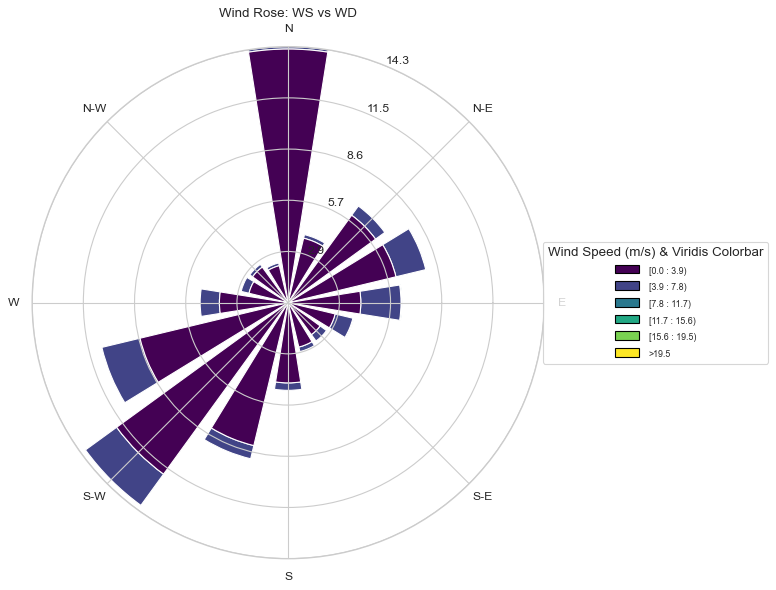

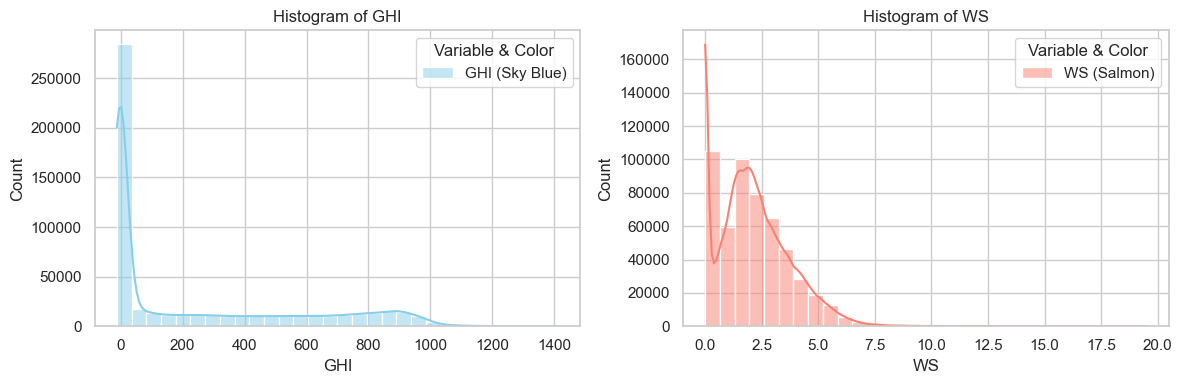

In [16]:
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white', cmap=plt.cm.viridis)
ax.set_legend(title="Wind Speed (m/s) & Viridis Colorbar", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Wind Rose: WS vs WD')
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='skyblue', label='GHI (Sky Blue)')
plt.legend(title="Variable & Color")
plt.title('Histogram of GHI')
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=30, kde=True, color='salmon', label='WS (Salmon)')
plt.legend(title="Variable & Color")
plt.title('Histogram of WS')
plt.tight_layout()
plt.show()

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_3224\1788556614.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


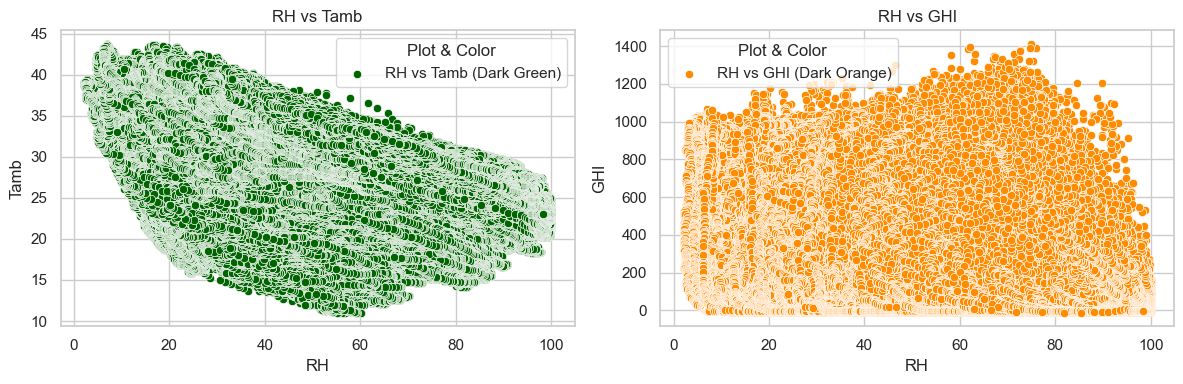

Correlation between RH and Tamb: -0.41484177497995545
Correlation between RH and GHI: -0.3600286885499284


In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='darkgreen', label='RH vs Tamb (Dark Green)')
plt.legend(title="Plot & Color")
plt.title('RH vs Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='darkorange', label='RH vs GHI (Dark Orange)')
plt.legend(title="Plot & Color")
plt.title('RH vs GHI')
plt.tight_layout()
plt.show()
print("Correlation between RH and Tamb:", df['RH'].corr(df['Tamb']))
print("Correlation between RH and GHI:", df['RH'].corr(df['GHI']))

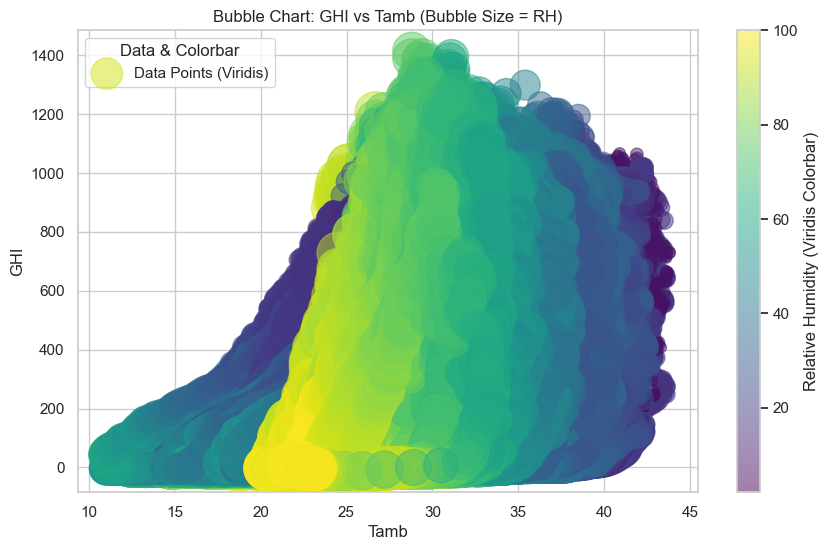

In [18]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5, c=df['RH'], cmap='viridis')
plt.colorbar(scatter, label='Relative Humidity (Viridis Colorbar)')
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.legend(labels=['Data Points (Viridis)'], title="Data & Colorbar")
plt.show()